# UFO Comment Analysis

## Data basic info.
- scrubbed.csv
- complete.csv : include **location** is blank or **time** is blank or erroneous.

Column : `city`, `state`, `time`, `description`, `duration`




> ## Task guide
1. Please show the changes in terminology used in "comment'
2. By sorting the data in timeline, and splitting 80/20, using the 80% can you predict what terminology will be used in the 20%?

# 1. Please show the changes in terminology used in 'comment'

## 1) Check the data

In [ ]:
import numpy as np
import pandas as pd


path_com = '/content/complete.csv'
path_sc = '/content/scrubbed.csv'

df_sc=pd.read_csv(path_sc)


df_sc

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556


In [ ]:
df_sc.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

> When it comes to `comments`, 15 null values were detected.
> -> delete 15 rows which contain null value in `comment`.

In [ ]:
df_sc = df_sc.dropna(subset=["comments"])
df_sc.isnull().sum()

datetime                   0
city                       0
state                   5795
country                 9668
shape                   1925
duration (seconds)         0
duration (hours/min)       0
comments                   0
date posted                0
latitude                   0
longitude                  0
dtype: int64

## 2) make 'year' column and plot histogram.(year VS comment)

In [ ]:
df_sc.sort_values(by = 'datetime')

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
10580,1/1/1910 24:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
10813,1/1/1944 12:00,san diego,ca,us,cigar,180,3 minutes,A sighting of one silver or white enlongated c...,7/25/2004,32.7152778,-117.156389
10814,1/1/1947 17:00,manama (bahrain),NaN,NaN,circle,300,5 minutes,Slow moving circular craft&#44 15 whitnesses&...,3/19/2009,26.216667,50.583333
10815,1/1/1953 14:00,oklahoma/texas border,tx,NaN,cigar,300,5 minutes,Copper cigar-shaped object in early 1950&#39s.,3/31/2008,33.660135,-97.715556
10816,1/1/1953 24:00,nebraska (rural),ne,NaN,NaN,600,10 min,This is an account told to me by my mother tha...,4/16/2005,41.492537,-99.901813
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556


> just sorting is not valid because datetime is string type.

a. convert datetime to datetime type.

> `parse()` only takes time between `0~23`. so change `24:00` to `00:00`.(ignore 1 day gap.)



In [ ]:
df_sc["datetime"] = df_sc["datetime"].str.replace("24:00","00:00")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_sc.loc[10580,'datetime']

'1/1/1910 00:00'

### convert to `datetime` object.

In [ ]:
# function of datetime
from dateutil.parser import parse
def str_to_year(datetime):
  return parse(datetime).year

In [ ]:
df_sc["year"]=df_sc["datetime"].map(str_to_year)
df_sc.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        1949
1        1949
2        1955
3        1956
4        1960
         ... 
80327    2013
80328    2013
80329    2013
80330    2013
80331    2013
Name: year, Length: 80317, dtype: int64

In [ ]:
df_sc = df_sc.sort_values(by='year')
df_sc

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
7863,11/11/1906 00:00,wien (austria),NaN,NaN,other,10800,3 h,The oldest professional photo of a UFO object ...,12/23/2002,48.208174,16.373819,1906
46858,6/1/1910 15:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056,1910
10580,1/1/1910 00:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056,1910
40275,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,about 1 min.,((NUFORC Note: Possible hoax. PD)) Saw 3 ci...,3/9/2004,46.227638,2.213749,1916
46694,6/11/1920 21:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,5/12/2009,40.1238889,-86.013333,1920
...,...,...,...,...,...,...,...,...,...,...,...,...
39280,4/26/2014 20:43,whittier,ca,us,fireball,120,2 minutes,Orange&#44 glowing fireball flying north; was ...,5/2/2014,33.9791667,-118.031944,2014
39279,4/26/2014 20:15,riverside,nj,us,diamond,120,2 minutes,Floating fire ball object in the shape of a di...,5/2/2014,40.0322222,-74.957778,2014
39278,4/26/2014 19:00,gilbert,az,us,triangle,60,1 minute,Sitting outside on my back porch I observed th...,5/2/2014,33.3527778,-111.788333,2014
39276,4/26/2014 17:00,greenwood,in,us,cross,20,15-20 seconds,3 strange cross shaped objects flying at an ex...,5/2/2014,39.6136111,-86.106667,2014


> sorted by year. it spans from `1906` to `2014.`. let's check by 'decade' bin.

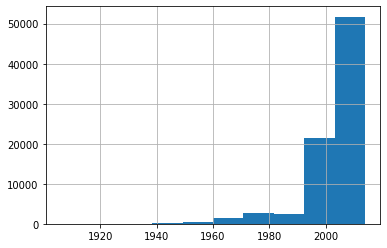

In [ ]:
df_sc["year"].hist()

In [ ]:
df_sc["year"].describe()

count    80317.000000
mean      2003.851613
std         10.424605
min       1906.000000
25%       2001.000000
50%       2006.000000
75%       2011.000000
max       2014.000000
Name: year, dtype: float64

highly right-skewed data. 

2) Preprocessing
- comments include `&#44`. this should be deleted.
- lower the capital letters.

In [ ]:
df_sc['comments'].groupby(df_sc.year).sum()

year
1906    The oldest professional photo of a UFO object ...
1910    Cigar shaped object moving from West to EastHi...
1916    ((NUFORC Note:  Possible hoax.  PD))  Saw 3 ci...
1920    ((NUFORC Note:  Probable hoax.  Note date.  PD...
1925    Young boy witnesses disc in sky above Illinois...
                              ...                        
2010    Saturday night at 915pm my wife and I were wat...
2011    DARK YELLOW ORANGISH BALLDriving on main road&...
2012    Strange flashing lights in western sky.Since I...
2013    ORANGE SPHERES IN THE SKY.Ufo sighting Grand P...
2014    Sphere with red glow within and bright orange ...
Name: comments, Length: 87, dtype: object

In [ ]:


df_sc.comments.iloc[7863:7873]

49045    Possible sighting of Military Camouflage Techn...
49046    orange glowing orb-like lights seen by myself ...
33264    Man at work witnessed a bright white light ris...
65890    Computer engineer driving on Rte. I-90 witness...
65889    Man sees pecular green light w/ &quot;comet-li...
50047    A triangular craft with a light at each end an...
63       Woman repts.  bright light in NW sky&#44 sudde...
49049    zero to very fast moving star and meteor glows...
46013    I was looking at the clouds and just over thes...
46012    Man repts. very clear sighting of a very brigh...
Name: comments, dtype: object

In [ ]:

df_sc.comments = df_sc.comments.str.replace("&#44","").str.lower()
df_sc.comments.iloc[7863:7873]

49045    possible sighting of military camouflage techn...
49046    orange glowing orb-like lights seen by myself ...
33264    man at work witnessed a bright white light ris...
65890    computer engineer driving on rte. i-90 witness...
65889    man sees pecular green light w/ &quot;comet-li...
50047    a triangular craft with a light at each end an...
63       woman repts.  bright light in nw sky suddenly ...
49049    zero to very fast moving star and meteor glows...
46013    i was looking at the clouds and just over thes...
46012    man repts. very clear sighting of a very brigh...
Name: comments, dtype: object

> change to df, which contains only `year` and `comment` column

In [ ]:
df = df_sc[['year','comments']]
df = df.reset_index(drop=True)
df.head(100)


,year,comments
0,1906,the oldest professional photo of a ufo object ...
1,1910,cigar shaped object moving from west to east
2,1910,historical sighting (1903 - 1913) northern mis...
3,1916,((nuforc note: possible hoax. pd)) saw 3 ci...
4,1920,((nuforc note: probable hoax. note date. pd...
...,...,...
95,1947,three disks appear in the west stop at zenith...
96,1948,small ufo at 100&#39 airspeed less than 20mph...
97,1948,a round overing craft over neighbors roof emit...
98,1948,while working on the farm they noticed a cube ...


c. additional preprocessing(delete unmeaningful words)

In [ ]:



df.comments = df.comments.str.replace("&#[0-9]+","",regex=True)

df.comments = df.comments.str.replace("&quot;","",regex=True)
df.comments = df.comments.str.replace(";","",regex=True)
df.head(100)


,year,comments
0,1906,the oldest professional photo of a ufo object ...
1,1910,cigar shaped object moving from west to east
2,1910,historical sighting (1903 - 1913) northern mis...
3,1916,((nuforc note: possible hoax. pd)) saw 3 ci...
4,1920,((nuforc note: probable hoax. note date. pd...
...,...,...
95,1947,three disks appear in the west stop at zenith...
96,1948,small ufo at 100 airspeed less than 20mph abs...
97,1948,a round overing craft over neighbors roof emit...
98,1948,while working on the farm they noticed a cube ...


In [ ]:
df.groupby((df.year//10)*10).count()

,year,comments
year,,
1900,1,1
1910,3,3
1920,3,3
1930,12,12
1940,101,101
1950,427,427
1960,1305,1305
1970,2380,2380
1980,2057,2057


> according to the data distribution, drop data before `1940`.
- divde into 8 group : 1940s-2010s 

In [ ]:
text_1940 =[]
text_1950 =[]
text_1960 =[]
text_1970 =[]
text_1980 =[]
text_1990 =[]
text_2000 =[]
text_2010 =[]

In [ ]:
for i in df.index:
  if df.loc[i,'year']<1940:
    continue;
  if 1940<=df.loc[i,'year']<1950:
    text_1940.append(df.loc[i,'comments'])
  if 1950<=df.loc[i,'year']<1960:
    text_1950.append(df.loc[i,'comments'])
  if 1960<=df.loc[i,'year']<1970:
    text_1960.append(df.loc[i,'comments'])
  if 1970<=df.loc[i,'year']<1980:
    text_1970.append(df.loc[i,'comments'])
  if 1980<=df.loc[i,'year']<1990:
    text_1980.append(df.loc[i,'comments'])
  if 1990<=df.loc[i,'year']<2000:
    text_1990.append(df.loc[i,'comments'])
  if 2000<=df.loc[i,'year']<2010:
    text_2000.append(df.loc[i,'comments'])  
  if 2010<=df.loc[i,'year']:
    text_2010.append(df.loc[i,'comments'])

In [ ]:
# NLTK liblary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

returns dataframe of `word frequency`, `word pairs` and `trigrams`

In [ ]:
# tokenizing
def word_frequency(sentence):
  sentence = " ".join(sentence)
  new_tokens = word_tokenize(sentence)
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')] #remove stopwords
  new_tokens = [t for t in new_tokens if t.isalpha()]# remove numbers
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens] #lemmatize words
  #counts the words, pairs and trigrams
  counted = Counter(new_tokens)
  counted_2= Counter(ngrams(new_tokens,2))
  counted_3= Counter(ngrams(new_tokens,3))
  word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
  trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
  return word_freq,word_pairs,trigrams






In [ ]:
sentence = ['that diamond is mine', 'i have already watched that UFO']
tup= word_frequency(sentence)

In [ ]:
tup[0]

,word,frequency
0,diamond,1
1,mine,1
2,already,1
3,watched,1
4,UFO,1


In [ ]:
data_1940=word_frequency(text_1940)[0]
data_1950=word_frequency(text_1950)[0]
data_1960=word_frequency(text_1960)[0]
data_1970=word_frequency(text_1970)[0]
data_1980=word_frequency(text_1980)[0]
data_1990=word_frequency(text_1990)[0]
data_2000=word_frequency(text_2000)[0]
data_2010=word_frequency(text_2010)[0]

[Text(0.5, 1.0, '2010s')]

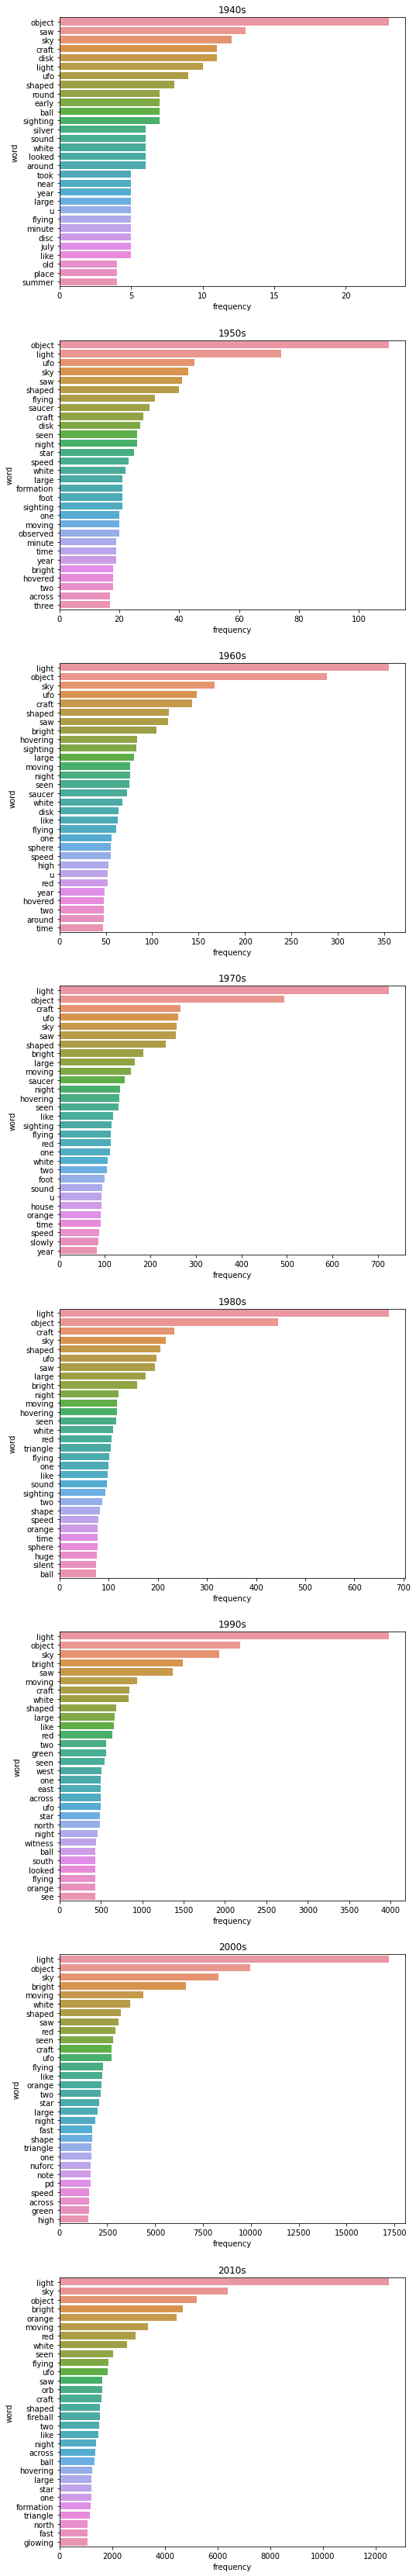

In [ ]:
fig, axes = plt.subplots(8,1,figsize=(8,60))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data_1940.head(30)).set(title='1940s')
sns.barplot(ax=axes[1],x='frequency',y='word',data=data_1950.head(30)).set(title='1950s')
sns.barplot(ax=axes[2],x='frequency',y='word',data=data_1960.head(30)).set(title='1960s')
sns.barplot(ax=axes[3],x='frequency',y='word',data=data_1970.head(30)).set(title='1970s')
sns.barplot(ax=axes[4],x='frequency',y='word',data=data_1980.head(30)).set(title='1980s')
sns.barplot(ax=axes[5],x='frequency',y='word',data=data_1990.head(30)).set(title='1990s')
sns.barplot(ax=axes[6],x='frequency',y='word',data=data_2000.head(30)).set(title='2000s')
sns.barplot(ax=axes[7],x='frequency',y='word',data=data_2010.head(30)).set(title='2010s')


## 1. Please show the changes in terminology used in "comment'
- 1941 ~ 1960: `object` ranked the top frequency. Typical words related to UFO like `saw`, `craft`, `light`, `sky` are also frequent word.
- 1960 ~ 1970 : `light`,`object`,`sky`,`ufo` term used the frequentist.
- 1970 ~ 1990 : `light`, `object`, `craft`
- 1990 ~ 2010 : `light`, `object`, `sky`, `bright` ,... `craft` or `ufo` were used much less than before. 


### Overall, `craft` or `ufo` used much by 1990, while `light`, `object`, `sky` remained the highest rank in frequency. 

- term `white`, `red`, `orange` were used from 1970, and reached the very frequent term which is an interesting phenomenon. Maybe the recently detected UFO has `white, orange, or red light`. 
- red light might look like `fireball` in 2010s.
- `green` light may also has been detected recently in 2010s.
- term `triangle` is continuously used even in recent data. It might mean `triangle shape` of UFO or `triangle path` of ufo. additional analysis is needed.

## TF-IDF



In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidfv = TfidfVectorizer()
# tfidfv = tfidfv.fit(text_1940)
# vocab = list(tfidfv.vocabulary_.keys())
# vocab.sort()

# tfidf_ = pd.DataFrame(tfidfv.transform(text_1940).toarray(), columns = vocab)
# tfidf_

## 2. By sorting the data in timeline, and splitting 80/20, using the 80% can you predict what terminology will be used in the 20%?

Let's make a generator which is trained by 80% of the data, and generate new comments.
### 1) preprocess for prediction!

In [ ]:
text = text_1940 + text_1950 + text_1960 + text_1970 + text_1980 + text_1990 + text_2000 + text_2010
len(text)
text[:5]

['as a boy some 60 plus years ago i saw a round silver disc in the sky when i looked up from playing with ant hills.',
 'bright object approchjng venus 1940s',
 'two children walking along highway saw unfamiliar object in sky.',
 'observing  mans warfare',
 'light next to my b-17']

In [ ]:
import re
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

def preprocess_line(line):
    line = line.lower().strip()
    line = re.sub(r"([?!,.¿])", r" \1 ", line)
    line = re.sub(r'[" "]+', r" ",line)
    line = re.sub(r"[^a-zA-Z?!,.¿]+", r" ", line)
    line = line.strip()
    line = '<start> ' + line + ' <end>'
    return line

In [ ]:
text_p = []
for i in text :
    if len(i) == 0:
        continue
    if i[-1] == ":":
        continue
    preprocessed_line = preprocess_line(i)
    text_p.append(preprocessed_line)
text_p[:10]

['<start> as a boy some plus years ago i saw a round silver disc in the sky when i looked up from playing with ant hills . <end>',
 '<start> bright object approchjng venus s <end>',
 '<start> two children walking along highway saw unfamiliar object in sky . <end>',
 '<start> observing mans warfare <end>',
 '<start> light next to my b <end>',
 '<start> vertical lines of crescent moons some rows in a night sky over naval base . <end>',
 '<start> white light at midnight traveling into outer space . <end>',
 '<start> my yr . old grandmother deleted described to me an encounter that occured in nebraska in about . she was driv <end>',
 '<start> louisiana midnight light like airplane minutes then corkscrewing up into the atmosphere <end>',
 '<start> sighting of four linearly arranged red lights in bearing sea <end>']

### 2) generate 'Token box' and fit on it!

In [ ]:
tokenizer = Tokenizer(num_words = 12000,
                     oov_token = "<OOV>"
                     )
tokenizer.fit_on_texts(text_p)
print(tokenizer)

### 3) Vectorization : Change preprocessed lines to 'tensor'
1)texts_to_sequences 2)pad_sequences

In [ ]:
tensor = tokenizer.texts_to_sequences(text_p)
print(tensor[:5])



## delete sentence which has token over 15.

# for line in tensor:
#     if len(line) > 15:
#         line.pop()

# print(len(tensor))



#padding
tensor = pad_sequences(tensor,maxlen=30, padding = 'post')

print(tensor.shape)

[[3, 64, 6, 1670, 222, 1528, 355, 710, 13, 30, 6, 96, 120, 212, 5, 4, 11, 92, 13, 84, 48, 27, 915, 20, 6574, 691, 2], [3, 16, 14, 1, 320, 144, 2], [3, 38, 1172, 349, 317, 333, 30, 5767, 14, 5, 11, 2], [3, 962, 6575, 7656, 2], [3, 9, 522, 12, 29, 711, 2]]
(80277, 30)


In [ ]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 30: break

1 : <OOV>
2 : end
3 : start
4 : the
5 : in
6 : a
7 : and
8 : of
9 : light
10 : lights
11 : sky
12 : to
13 : i
14 : object
15 : over
16 : bright
17 : was
18 : at
19 : it
20 : with
21 : on
22 : moving
23 : orange
24 : white
25 : red
26 : then
27 : from
28 : shaped
29 : my
30 : saw


In [ ]:
# generate source sentence slicing the last token

src_input = tensor[:, :-1]  
# generate target sentence from <start>
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[   3   64    6 1670  222 1528  355  710   13   30    6   96  120  212
    5    4   11   92   13   84   48   27  915   20 6574  691    2    0
    0]
[  64    6 1670  222 1528  355  710   13   30    6   96  120  212    5
    4   11   92   13   84   48   27  915   20 6574  691    2    0    0
    0]


## 4) Train/Test split 8:2!
- data is already sorted by timeline.

In [ ]:
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input,tgt_input,
    test_size = 0.2,
    random_state = 20)

In [ ]:
print("x_Train :", enc_train.shape)
print("y_Train :", dec_train.shape)
print("x_val :", enc_val.shape)
print("y_val :", dec_val.shape)

x_Train : (64221, 29)
y_Train : (64221, 29)
x_val : (16056, 29)
y_val : (16056, 29)


In [ ]:
BUFFER_SIZE = enc_train.shape[0] # randomize data
BATCH_SIZE = 1024 #one batch contains 1024 tokens
steps_per_epoch = BUFFER_SIZE // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words +1  # define vocabulary size

print(steps_per_epoch,VOCAB_SIZE)

dataset = tf.data.Dataset.from_tensor_slices((enc_train, dec_train)) #convert to tensorflow Dataset
dataset = dataset.shuffle(BUFFER_SIZE) # randomize
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)  # divde into batch
print(dataset) 
BUFFER_SIZE_2 = enc_val.shape[0]

#print(BUFFER_SIZE_2)
valset = tf.data.Dataset.from_tensor_slices((enc_val, dec_val))
valset = dataset.shuffle(BUFFER_SIZE_2)
valset = dataset.batch(BATCH_SIZE, drop_remainder=True)
print(valset)

62 12001
<BatchDataset shapes: ((1024, 29), (1024, 29)), types: (tf.int32, tf.int32)>
<BatchDataset shapes: ((1024, 1024, 29), (1024, 1024, 29)), types: (tf.int32, tf.int32)>


In [ ]:
# Text Generator Model Architecture

class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.dropout_1 = tf.keras.layers.Dropout(0.2)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.dropout_2 = tf.keras.layers.Dropout(0.2)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.dropout_1(out)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.dropout_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [ ]:

for src_sample, tgt_sample in dataset.take(1): break

# Just put in one batch.

model(src_sample)
model.summary()

Model: "text_generator_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     multiple                  3072256   
                                                                 
 dropout_8 (Dropout)         multiple                  0         
                                                                 
 lstm_8 (LSTM)               multiple                  5246976   
                                                                 
 lstm_9 (LSTM)               multiple                  8392704   
                                                                 
 dropout_9 (Dropout)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  12301025  
                                                                 
Total params: 29,012,961
Trainable params: 29,012,

### 5) Training

optimizer : `Adam`

loss : `sparse-categorical-crossentropy`

In [ ]:
optimizer = tf.keras.optimizers.Adam()
#Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(
     from_logits=True, reduction='none')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss',
                             verbose=1)

In [ ]:
model.compile(loss = loss, optimizer = optimizer)
history = model.fit(dataset,validation_data=(enc_val, dec_val), batch_size = BATCH_SIZE, callbacks=[checkpoint], epochs = 10)

Epoch 1/10
62/62 [==============================] - ETA: 0s - loss: 4.1805
Epoch 00001: val_loss improved from inf to 3.54209, saving model to my_checkpoint.ckpt
62/62 [==============================] - 48s 733ms/step - loss: 4.1805 - val_loss: 3.5421
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 3.2900
Epoch 00002: val_loss improved from 3.54209 to 3.07536, saving model to my_checkpoint.ckpt
62/62 [==============================] - 45s 719ms/step - loss: 3.2900 - val_loss: 3.0754
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 3.0284
Epoch 00003: val_loss improved from 3.07536 to 2.97672, saving model to my_checkpoint.ckpt
62/62 [==============================] - 46s 745ms/step - loss: 3.0284 - val_loss: 2.9767
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 2.9270
Epoch 00004: val_loss improved from 2.97672 to 2.88906, saving model to my_checkpoint.ckpt
62/62 [==============================] - 46s 745ms/step - loss: 2.9270

In [ ]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # convert init_sentence to tensor for test
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    enc_val
    end_token = tokenizer.word_index["end"]

    # predict one word and becomes sentence
    #    1. input tensor 
    #    2. extract the most probable word index from predicted value
    #    3. link word index (from 2) after the sentence
    #    4. if model predict <end> token or max_len, end the sentence generation.
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # convert word index to word using tokenizer 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
generate_text(model, tokenizer, init_sentence="<start> i saw ", max_len=20)

'start i saw a bright light in the sky end '

## If given more time,
- the model is not good because it ends always `in the sky`. It needs to be changed.
- the faced task is predicting terminology in 20%, I think it is not really precise result. I will find other model which is more proper.
- try other model or use `huggingface` framework.
- try to evaluate terminology, use TF-IDF analysis among decades.

Reference : https://www.absentdata.com/python-graphs/python-word-frequency/

## Scrubbed data: not used

In [ ]:
df_com=pd.read_csv(path_com)
df_com.head(10)

ParserError: ignored

> `completed` file has inconsistent columns,  so different measure is needed to convert to DataFrame.

In [ ]:
import csv
with open (path_com) as f:
  lines = csv.reader(f)
  comlist=[]
  for line in lines:
    comlist.append(line)
df2 = pd.DataFrame(comlist)
df2

,0,1,2,3,4,5,6,7,8,9,10,11
0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,None
1,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.9411111,None
2,10/10/1949 21:00,lackland afb,tx,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,None
3,10/10/1955 17:00,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,None
4,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.6458333,None
...,...,...,...,...,...,...,...,...,...,...,...,...
88871,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.2844444,None
88872,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.2655556,None
88873,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.4777778,None
88874,9/9/2013 23:00,starr,sc,us,diamond,0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.3769444,-82.6958333,None


change first row to `column` row.

In [ ]:
df2 = df2.rename(columns = df2.iloc[0])
df2 = df2.drop(df2.index[0])
df2

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,NaN
1,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.9411111,None
2,10/10/1949 21:00,lackland afb,tx,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,None
3,10/10/1955 17:00,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,None
4,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.6458333,None
5,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.8036111,None
...,...,...,...,...,...,...,...,...,...,...,...,...
88871,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.2844444,None
88872,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.2655556,None
88873,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.4777778,None
88874,9/9/2013 23:00,starr,sc,us,diamond,0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.3769444,-82.6958333,None


In [ ]:
df2.isnull().sum()

datetime                    0
city                        0
state                       0
country                     0
shape                       0
duration (seconds)          0
duration (hours/min)        0
comments                    0
date posted                 0
latitude                    0
longitude                   0
NaN                     88679
dtype: int64

In [ ]:
df2.iloc[876]

datetime                                                  10/1/2006 12:00
city                                                                     
state                                                                    
country                                                                  
shape                                                                    
duration (seconds)                                                      0
duration (hours/min)                                                     
comments                                                                 
date posted             ((EDITORIAL COMMENT ABOUT THE UFO PHENOMEN))  ...
latitude                                                       10/30/2006
longitude                                                               0
NaN                                                                     0
Name: 877, dtype: object